In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Ex 1

In [2]:
def f1(x):
    return np.cos(-x)

def f1_d2(x):  # f1 derivata de doua ori
    return -np.cos(-x)

Functia este derivabila de (cel putin) 4 ori pe interval, cum este cerut. Conform cursului 12:



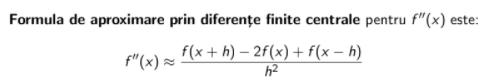

In [3]:
nr = 100

def dif_fin(f, f_d2, st, dr, optiune, epsilon=1e-5):
    x_gr = np.linspace(st, dr, nr)
    # ne intereseaza sa aflam derivata a doua
    # nu e necesar sa facem observatii pe f(x)
    y_gr = f_d2(x_gr)
    
    plt.figure()
    if optiune == 1:
        plt.plot(x_gr, y_gr, label="f''(x)")
        
    N = 1
    erori = []
    while True:  # pornim cu N = 1 si il crestem pana cand eroarea <= 1e-5
        N += 1
        X = np.linspace(st, dr, N + 1)
        y = f_d2(X)
        
        # N este util pentru determinarea lui h
        h = X[1] - X[0]
        
        # in aproximarea derivatei, este folosita doar f(x)
        # f''(x) este folosita doar pentru comparatie si calcularea erorii
        def f_d2_aprox(x):
            return ( f(x + h) - 2 * f(x) + f(x - h) ) / h ** 2
        
        y_p = f_d2_aprox(x_gr)
        
        eroare_max = np.max(np.abs(y_p - y_gr))
        erori.append((N+1, eroare_max))
        
        if eroare_max <= epsilon:
            break
    
    if optiune == 1:    
        plt.scatter(X, y, color='black')
        de = ''
        if N+1 >= 20:
            de = 'de '
        plt.plot(x_gr, y_p, color='orange', linestyle='--', label=f"f''(x) aproximat cu {N+1} {de}puncte")
        print(f'Eroare: {eroare_max}')
        
    elif optiune == 2:
        erori = np.array(erori)
        plt.plot(erori[:,0], erori[:,1], label='Eroarea de trunchiere')
    
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


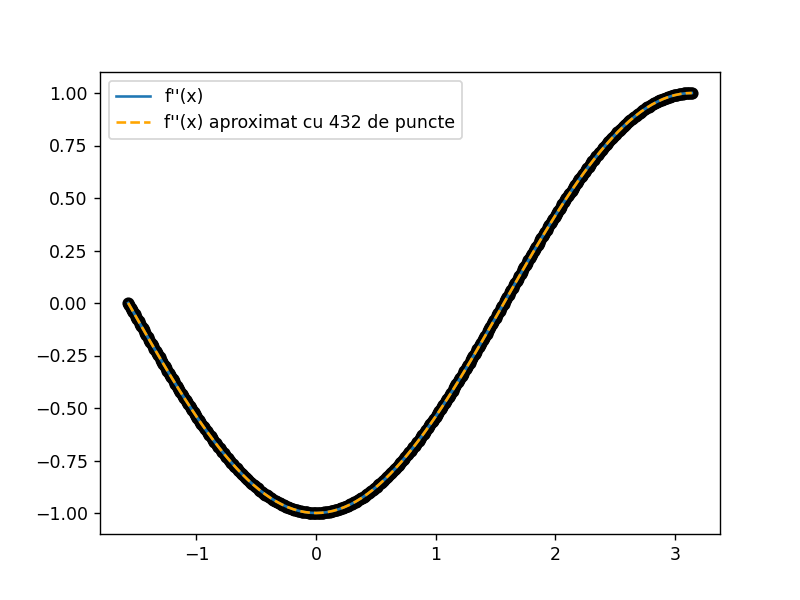

Eroare: 9.96195842217773e-06


In [4]:
dif_fin(f1, f1_d2, -np.pi / 2, np.pi, 1)

<IPython.core.display.Javascript object>


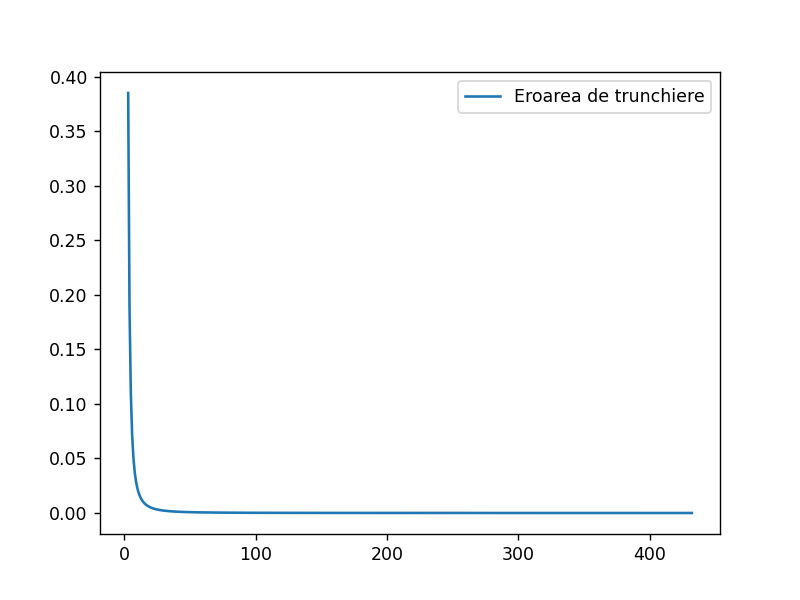

In [5]:
dif_fin(f1, f1_d2, -np.pi / 2, np.pi, 2)

Pentru ca in primul grafic sunt alese foarte multe puncte, graficul este greu de observat.

Acesta este un exemplu cu mai putine puncte alese:

<IPython.core.display.Javascript object>


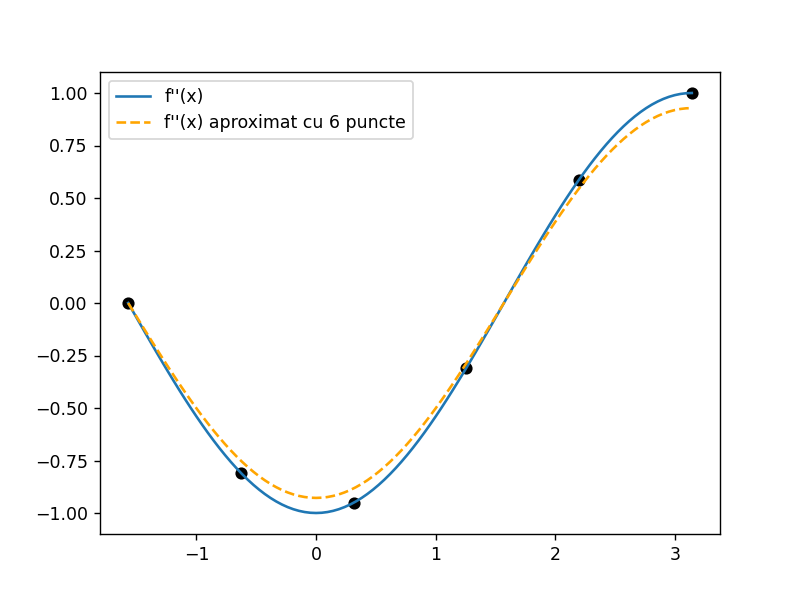

Eroare: 0.07186475216546084


In [6]:
dif_fin(f1, f1_d2, -np.pi / 2, np.pi, 1, 1e-1)

# Ex 2

In [11]:
def f2(x):
    return np.exp(- (x ** 2 / 2)) / np.sqrt(2 * np.pi)

x2 = np.linspace(-10, 10, 51)

Conform cursului 13:

Pentru metoda dreptunghiului:


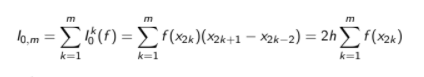

Pentru metoda trapezului:


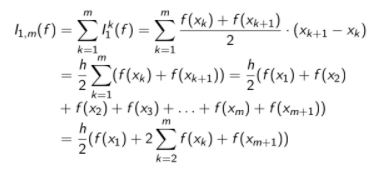

Pentru metoda Simpson:

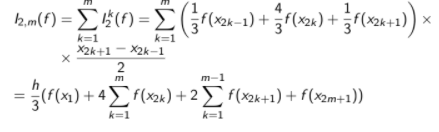

In [7]:
def integrala(f, x, metoda):
    if len(x) < 2:
        print('Prea putine puncte')
        return
    h = x[1] - x[0]
    # indicii pentru x sunt diferiti pentru ca indexarea este de la 0, nu de la 1 ca in curs
    if metoda == 'dreptunghi':
        m = len(x) // 2
        if not len(x) % 2 == 1:
            print('N trebuie sa fie impar')
            return
        return 2 * h * np.sum([ f(x[2 * k + 1]) for k in range(m) ])
    elif metoda == 'trapez':
        m = len(x)
        return h / 2 * ( f(x[0]) + 2 * np.sum([ f(x[k]) for k in range(1, m-1) ]) + f(x[m-1]) )
    elif metoda == 'Simpson':
        m = len(x) // 2
        if not len(x) % 2 == 1:
            print('N trebuie sa fie impar')
            return
        return h / 3 * ( f(x[0]) + 4 * np.sum([ f(x[2 * k + 1]) for k in range(m) ]) + \
                         2 * np.sum([ f(x[2 * k]) for k in range(1, m-1) ]) + f(x[-1]) )
    else:
        print('Metoda invalida')

### Dreptunghi

In [12]:
integrala(f2, x2, 'dreptunghi')

1.0000000000000815

### Trapez

In [13]:
integrala(f2, x2, 'trapez')

1.000000000000001

### Simpson

In [14]:
integrala(f2, x2, 'Simpson')

1.0000000000000278

# Verificare raspunsuri

www.desmos.com/calculator aproximeaza integrala la 1:

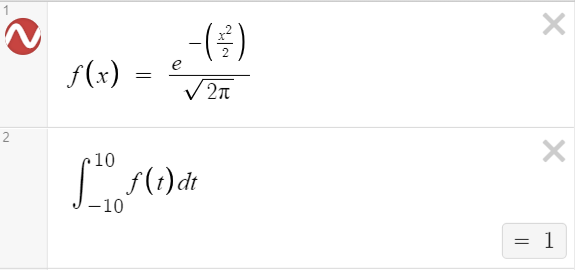

In schimb, www.integral-calculator.com aproximeaza integrala la 0.1:

https://www.integral-calculator.com/#expr=exp%28-%20%28x%20%2A%2A%202%20%2F%202%29%29%20%2F%20sqrt%282%20%2A%20pi%29&lbound=-10&ubound=10

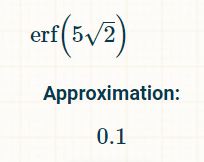

Ceea ce e gresit pentru ca erf(5 * sqrt(2)) este  1:

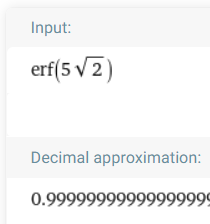

De asemenea, functia e pozitiva si exista valori in interval mai mari de 0.1:

In [125]:
f2(0)

0.3989422804014327

Am observat ca si integral-calculator da rezultatul corect daca este bifata optiunea "Integrate numerically only":

https://www.integral-calculator.com/#expr=exp%28-%20%28x%20%2A%2A%202%20%2F%202%29%29%20%2F%20sqrt%282%20%2A%20pi%29&lbound=-10&ubound=10&numonly=1

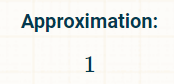